### Lesson6 Тема “Обучение с учителем”

#### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте
датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston


In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
data = boston["data"]
data.shape

(506, 13)

Создаем датафрейм 'X' в качестве названий для столбцов возьмём массив `feature_names`:

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
target = boston["target"]

Создаем таблицу датафрейм y, в которую запишем целевые значения:

In [8]:
y = pd.DataFrame(target, columns=["price"])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Разбиение данных на тренировочную и тестовую выборку выполняем с помощью функции train_test_split из модуля sklearn.model_selection.

In [9]:
from sklearn.model_selection import train_test_split

Разбеение датафреймов на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Создаем модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

Обучим модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

y_pred.shape

(127, 1)

In [15]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


Вычисляем R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test, y_pred)

0.6844267283527139

#### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля
sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
lr = RandomForestRegressor()

In [20]:
model = RandomForestRegressor(n_estimators = 1000, max_depth=12, random_state = 42)

In [21]:
lr.fit(X_train, y_train.values[:, 0])

RandomForestRegressor()

In [22]:
y_pred = lr.predict(X_test)

y_pred.shape

(127,)

In [23]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,23.272
274,32.4,30.943
491,13.6,17.639
72,22.8,23.950
452,16.1,16.808
76,20.0,20.943
316,17.8,19.708
140,14.0,15.464
471,19.6,21.318
500,16.8,20.617


In [24]:
r2_score(y_test, y_pred)

0.8558606125592956

#### *Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [25]:
# Вызвать документацию для класса RandomForestRegressor,
?RandomForestRegressor

In [26]:
model = RandomForestRegressor()

In [27]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
print(model.feature_importances_)

[0.03791137 0.00141532 0.00620001 0.00050906 0.01084239 0.40756252
 0.01450586 0.06146536 0.0033898  0.01151544 0.01694087 0.01196853
 0.41577346]


In [29]:
#С помощью этого атрибута найти сумму всех показателей важности, 
model.feature_importances_.sum()

1.0000000000000002

In [30]:
#установить, какие два признака показывают наибольшую важность.
max_value_idx1=model.feature_importances_.argmax()
max_value_idx1

12

In [31]:
max_value_idx2=0
max_value=model.feature_importances_[max_value_idx2]
for i in range(model.n_features_):
    if max_value<model.feature_importances_[i] and i!=max_value_idx1:
        max_value=model.feature_importances_[i]
        max_value_idx2=i
print(max_value_idx2)

5


In [32]:
from matplotlib import pyplot

In [33]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.03791
Feature: 1, Score: 0.00142
Feature: 2, Score: 0.00620
Feature: 3, Score: 0.00051
Feature: 4, Score: 0.01084
Feature: 5, Score: 0.40756
Feature: 6, Score: 0.01451
Feature: 7, Score: 0.06147
Feature: 8, Score: 0.00339
Feature: 9, Score: 0.01152
Feature: 10, Score: 0.01694
Feature: 11, Score: 0.01197
Feature: 12, Score: 0.41577


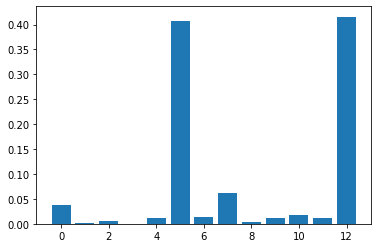

In [34]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию
по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать
задачу классификации - будем определять,какие из транзакциции по кредитной карте являются
мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества
относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать
лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка
несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет
ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы
датафрейма:

1pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и
запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных,
используя в качестве аргументов массивы y_test и y_pred_proba.

#### *Дополнительные задания:

1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в
переменную data.
2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
содержащий ее ключи.
3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
переносами и т.д.4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.
5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
создайте датафрейм под названием X.
6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
Название поля - 'target'.
8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название
X_corr.
9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
значению превышает 0.5 (причем, само поле target не должно входить в этот список).
10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.